In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [2]:
# churn.csv
churn_df = pd.read_csv("./data/churn.csv")
churn_df["lastParticipationDate"] = pd.to_datetime(churn_df["lastParticipationDate"]).dt.normalize()

# comments_clean_anonimized.csv
cca_df = pd.read_csv("./data/comments_clean_anonimized.csv")
cca_df['commentDate'] = pd.to_datetime(cca_df['commentDate']).dt.normalize()
cca_df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/python_dateutil-2.8.1-py3.8.egg/dateutil/parser/_parser.py:1213: UnknownTimezoneWarning: tzname CEST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,2017-03-20
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,2017-03-20
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,2017-03-20
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,2017-03-20
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,2017-03-20


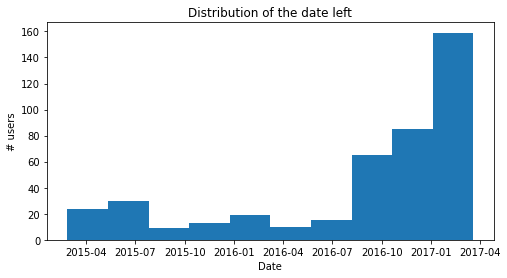

In [3]:
# show the date distribution of employees who left the company
churned_emp = churn_df[churn_df['employee'] < 0]
plt.figure(figsize=(8, 4))
plt.hist(churned_emp['lastParticipationDate'])
plt.title("Distribution of the date left")
plt.xlabel("Date")
plt.ylabel("# users")
plt.show()

In [4]:
# Pick an arbitrary date
import datetime
date = datetime.datetime(2016, 11, 1)

In [5]:
# Find employees that have commented before a date
cca_sliced = cca_df[cca_df['commentDate'] <= date]
cca_sliced.describe()

,employee,likes,dislikes
count,48754.000000,48754.000000,48754.000000
mean,123.125446,6.626000,1.192887
std,150.125412,7.542726,2.489558
min,-217.000000,0.000000,0.000000
25%,28.000000,2.000000,0.000000
50%,99.000000,4.000000,0.000000
75%,192.000000,9.000000,1.000000
max,999.000000,72.000000,53.000000


In [6]:
# assuming lastParticipationDate is close to the date employees left the company
select_emp = churn_df[churn_df['lastParticipationDate'] > date]
select_emp.describe()

,employee,numVotes
count,3455.000000,3455.000000
mean,175.699855,56.920116
std,197.678576,77.173621
min,-85.000000,0.000000
25%,40.000000,7.000000
50%,123.000000,25.000000
75%,237.000000,77.000000
max,999.000000,740.000000


In [7]:
# Join two datasets to get all active employees on and before year 2016
cca_joined = pd.merge(select_emp, cca_sliced, on=["employee", "companyAlias"], how="inner")
cca_joined

,employee,companyAlias,numVotes,lastParticipationDate,stillExists,commentId,txt,likes,dislikes,commentDate
0,2,56aec740f1ef260003e307d6,72,2017-03-17,True,5808c2652249d8000331fdf3,**********************************,8.0,2.0,2016-10-20
1,2,56aec740f1ef260003e307d6,72,2017-03-17,True,576bb20b60bb1c0003016fcd,*********************************,11.0,1.0,2016-06-23
2,2,56aec740f1ef260003e307d6,72,2017-03-17,True,5769446f464aec0003fc040c,**********************************************...,5.0,4.0,2016-06-21
3,2,56aec740f1ef260003e307d6,72,2017-03-17,True,575fdddafdfb340003a74c0f,**********************************************...,5.0,8.0,2016-06-14
4,2,56aec740f1ef260003e307d6,72,2017-03-17,True,57555b5799c1e500038392ba,**************************************,1.0,2.0,2016-06-06
...,...,...,...,...,...,...,...,...,...,...
36159,251,57d956302a040a00036a8905,50,2017-02-07,True,580094677c678600038e10e7,**********************************************...,7.0,0.0,2016-10-14
36160,251,57d956302a040a00036a8905,50,2017-02-07,True,57ff5cbdc5e7ba000369c278,***,1.0,1.0,2016-10-13
36161,251,57d956302a040a00036a8905,50,2017-02-07,True,57fdee3f5233c30003116782,**************************,4.0,0.0,2016-10-12
36162,251,57d956302a040a00036a8905,50,2017-02-07,True,57fc9b7c12cdbd000396e290,**********************************************...,13.0,0.0,2016-10-11


In [8]:
cca_joined.describe()

,employee,numVotes,likes,dislikes
count,36164.000000,36164.000000,36164.000000,36164.000000
mean,132.924068,171.304861,7.111077,1.268167
std,138.839586,146.590048,7.844567,2.573206
min,-85.000000,0.000000,0.000000,0.000000
25%,33.000000,66.000000,2.000000,0.000000
50%,106.000000,135.000000,5.000000,0.000000
75%,194.000000,240.000000,9.000000,2.000000
max,999.000000,740.000000,72.000000,53.000000


In [9]:
emp_list = cca_joined[["employee", "companyAlias"]].drop_duplicates()
emp_list

,employee,companyAlias
0,2,56aec740f1ef260003e307d6
18,3,56aec740f1ef260003e307d6
34,-4,56aec740f1ef260003e307d6
54,4,56aec740f1ef260003e307d6
62,475,56aec740f1ef260003e307d6
...,...,...
36048,243,57d956302a040a00036a8905
36068,244,57d956302a040a00036a8905
36080,249,57d956302a040a00036a8905
36088,250,57d956302a040a00036a8905


In [10]:
emp_list.describe()

,employee
count,1484.000000
mean,142.090970
std,159.122337
min,-85.000000
25%,34.000000
50%,104.000000
75%,202.000000
max,999.000000


In [11]:
emp_list[emp_list['employee'] < 0].count()

employee        84
companyAlias    84
dtype: int64

In [12]:
emp_list[emp_list['employee'] > 0].count()

employee        1400
companyAlias    1400
dtype: int64

In [13]:
# Save the list for future use
emp_list.to_csv("./data/emp_list.csv")